<a href="https://colab.research.google.com/github/ali-cia01/world-mental-health-analysis/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def load_data():
    prev_df = pd.read_csv('/content/drive/MyDrive/1- mental-illnesses-prevalence.csv')
    dalys_df = pd.read_csv('/content/drive/MyDrive/updated_burden_data.csv')

    rename_rules = {
        'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized': 'Schizophrenia',
        'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized': 'Depression',
        'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized': 'Anxiety',
        'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized': 'Bipolar',
        'Eating disorders (share of population) - Sex: Both - Age: Age-standardized': 'Eating_Disorders',
        'DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Depressive disorders': 'Depression',
        'DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Schizophrenia': 'Schizophrenia',
        'DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Bipolar disorder': 'Bipolar',
        'DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Eating disorders': 'Eating_Disorders',
        'DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Anxiety disorders': 'Anxiety'
    }

    prev_df = prev_df.rename(columns=rename_prev)
    dalys_df = dalys_df.rename(columns=rename_prev)

    return prev_df, dalys_df, rename_rules


In [ ]:
prev_df, dalys_df, rename_rules = load_data()

In [ ]:

targets = ['Schizophrenia', 'Depression', 'Anxiety', 'Bipolar', 'Eating_Disorders']

# 1. 결측치 확인
print("\n1. 결측치 현황")
print(prev_df.isnull().sum())

# 데이터 전처리
prev_df = prev_df.drop(columns=['Code'], errors='ignore').dropna()

print("\n2. 유병률 기초 통계량:")
print(prev_df[targets].describe())


print(f"\n--- [2] DALYs ---")

# 1. 결측치 확인
print("\n2-1. 결측치 현황")
print(dalys_df.isnull().sum())

# 2. 전처리 및 기초 통계
dalys_df = dalys_df.drop(columns=['Code'], errors='ignore').dropna()
print("\n2-2. DALYs 기초 통계량:")
print(dalys_df[targets].describe())



1. 결측치 현황
Entity                0
Code                270
Year                  0
Schizophrenia         0
Depression            0
Anxiety               0
Bipolar               0
Eating_Disorders      0
dtype: int64

2. 유병률 기초 통계량:
       Schizophrenia   Depression      Anxiety      Bipolar  Eating_Disorders
count    6420.000000  6420.000000  6420.000000  6420.000000       6420.000000
mean        0.266604     3.767036     4.101840     0.636968          0.195664
std         0.039383     0.925286     1.050543     0.233391          0.138380
min         0.188416     1.522333     1.879996     0.181667          0.044780
25%         0.242267     3.080036     3.425846     0.520872          0.096416
50%         0.273477     3.636772     3.939547     0.579331          0.144150
75%         0.286575     4.366252     4.564164     0.844406          0.251167
max         0.462045     7.645899     8.624634     1.506730          1.031688

--- [2] DALYs ---

2-1. 결측치 현황
Entity                0
Code      

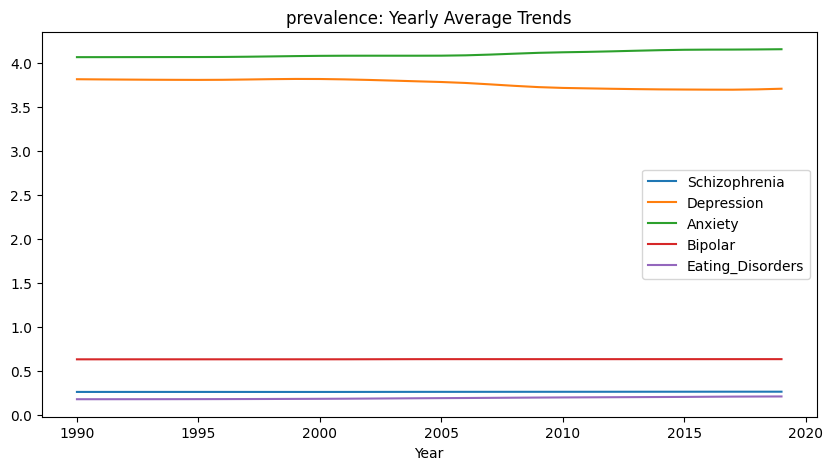

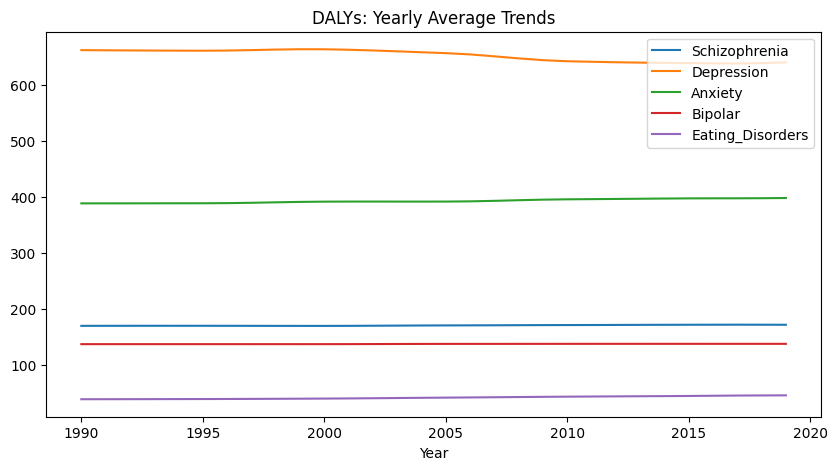

In [ ]:
# 3. 연도별 평균
plt.figure(figsize=(10, 5))
prev_df.groupby('Year')[targets].mean().plot(ax=plt.gca())
plt.title('prevalence: Yearly Average Trends')
plt.show()

plt.figure(figsize=(10, 5))
dalys_df.groupby('Year')[targets].mean().plot(ax=plt.gca())
plt.title('DALYs: Yearly Average Trends')
plt.show()


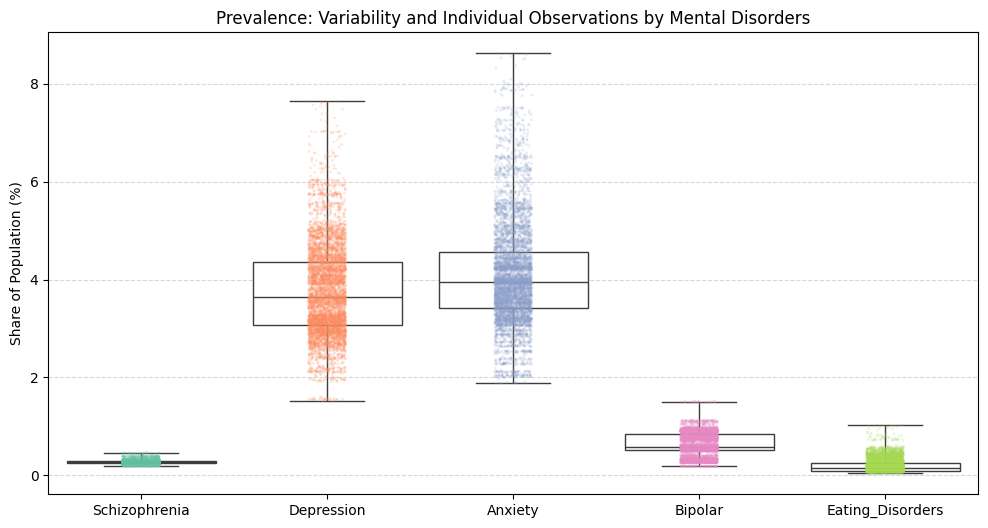

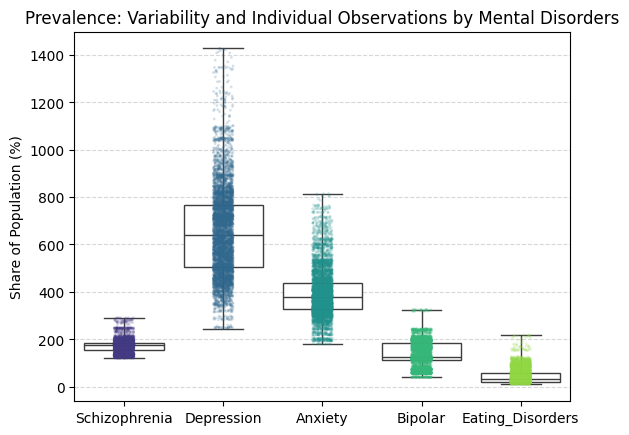


============================== Prevalence 데이터 분석 시작 ==============================


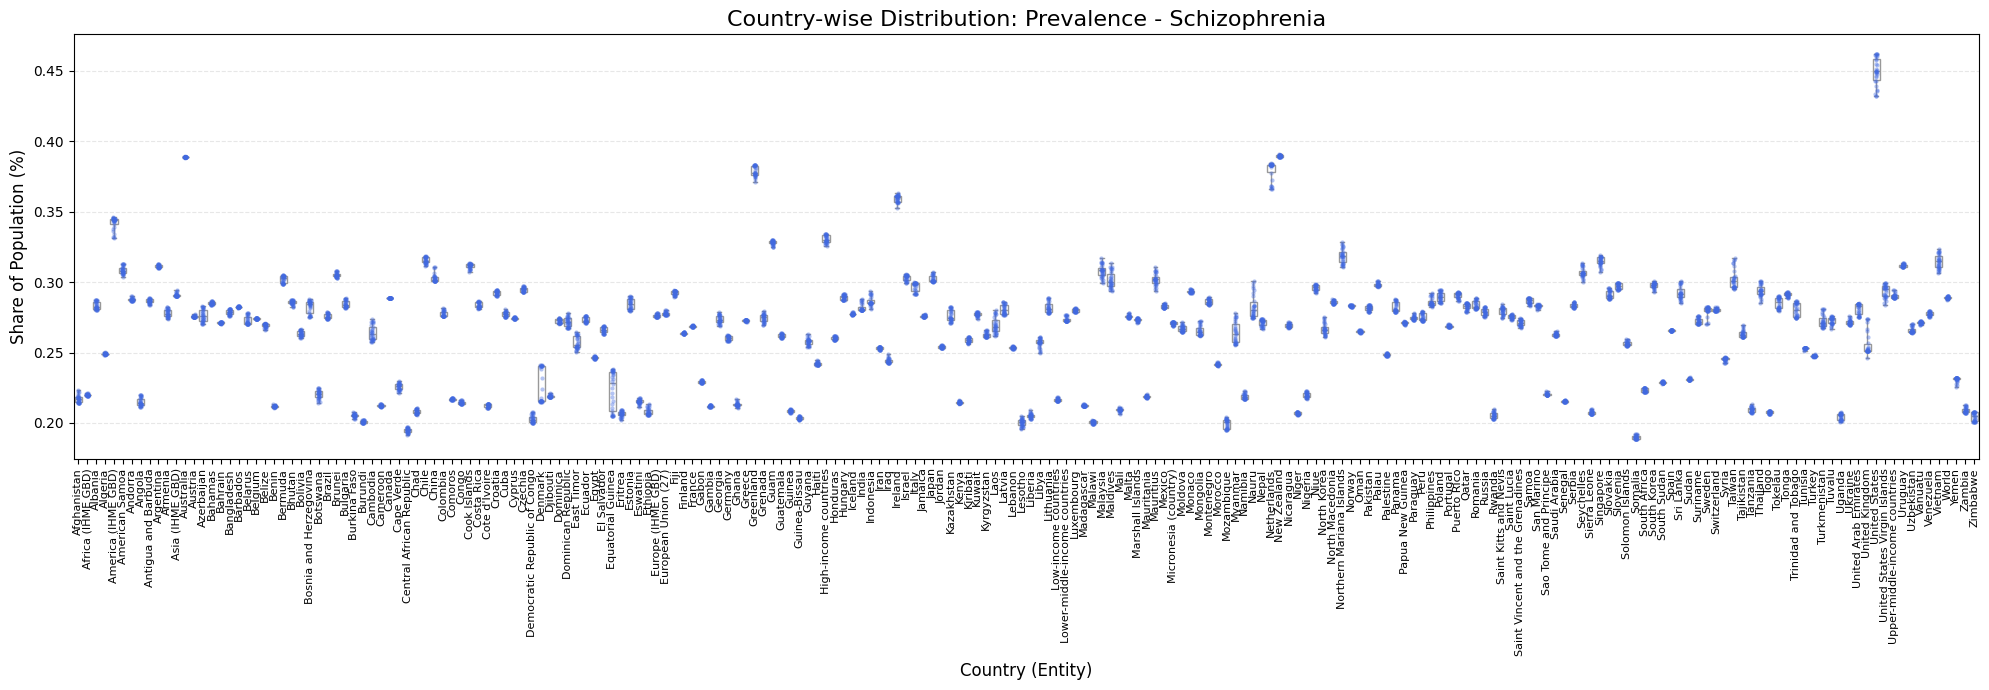

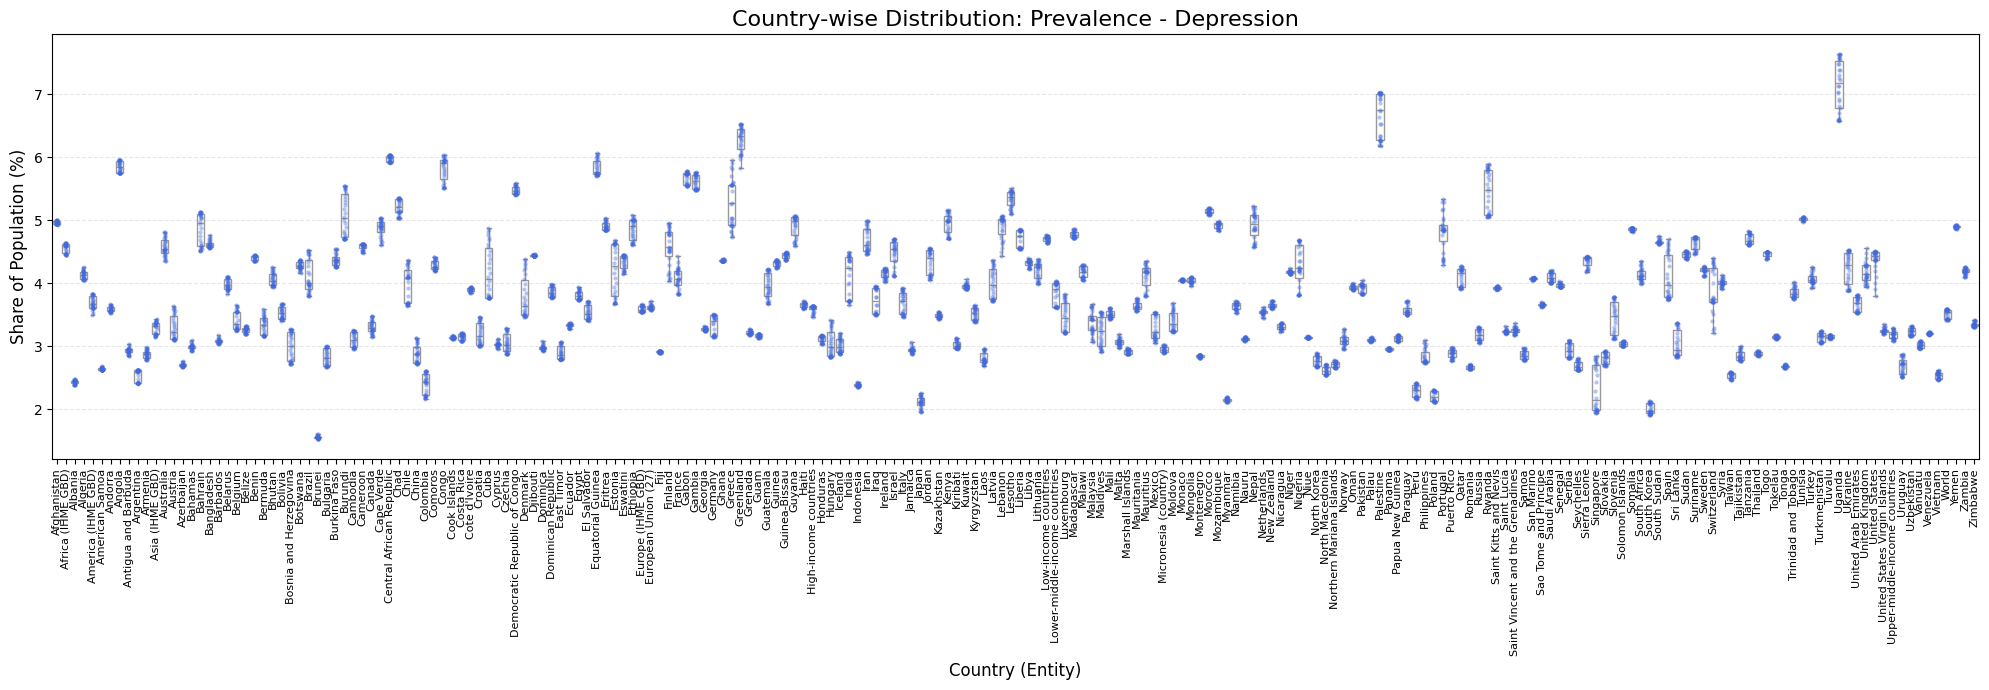

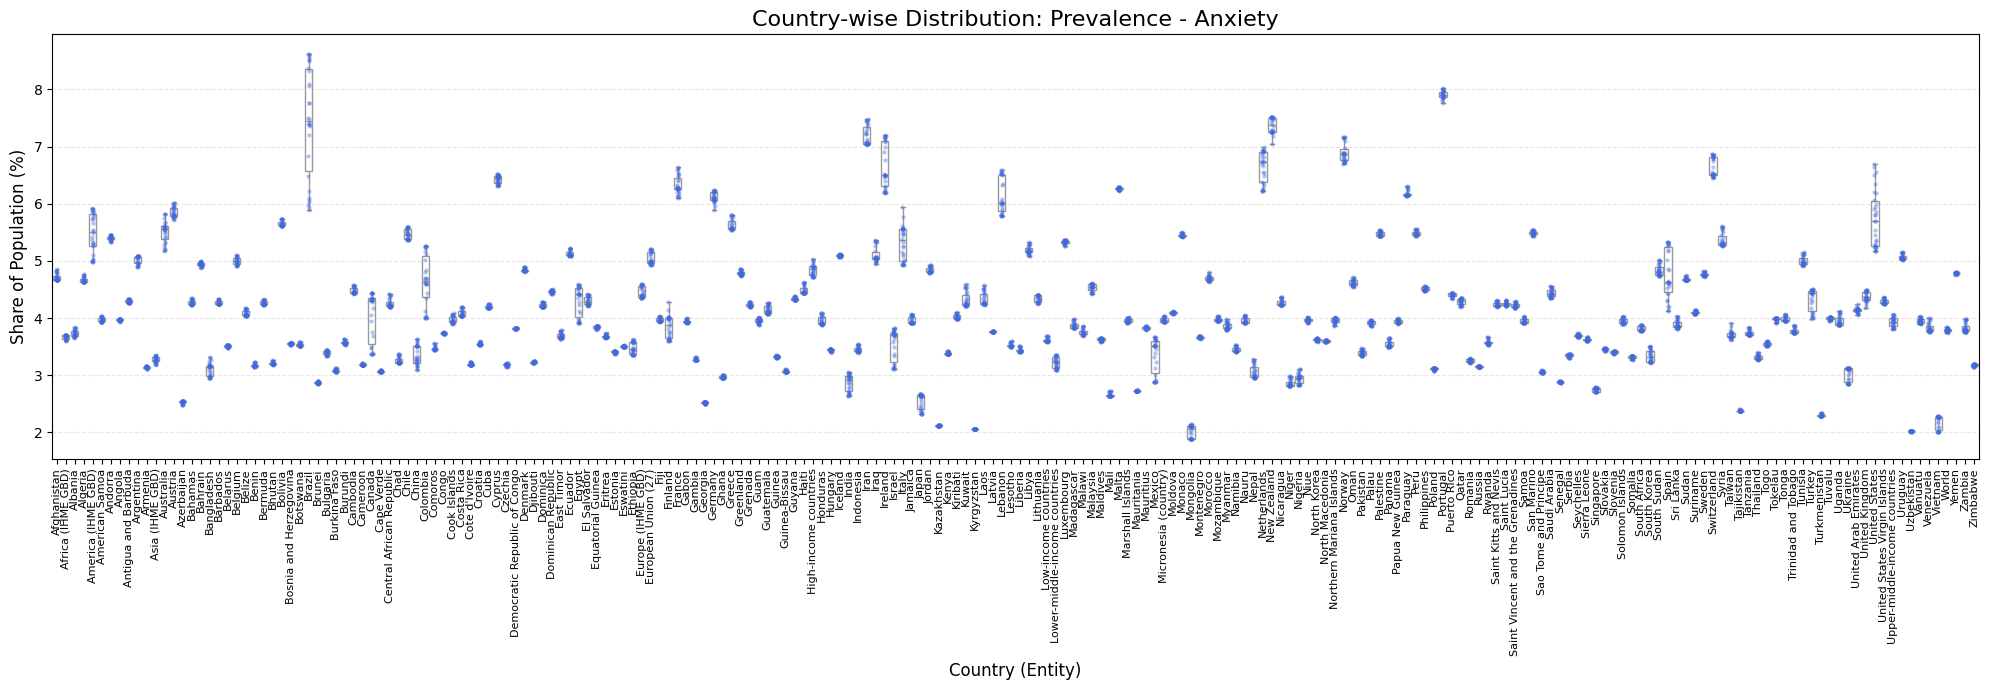

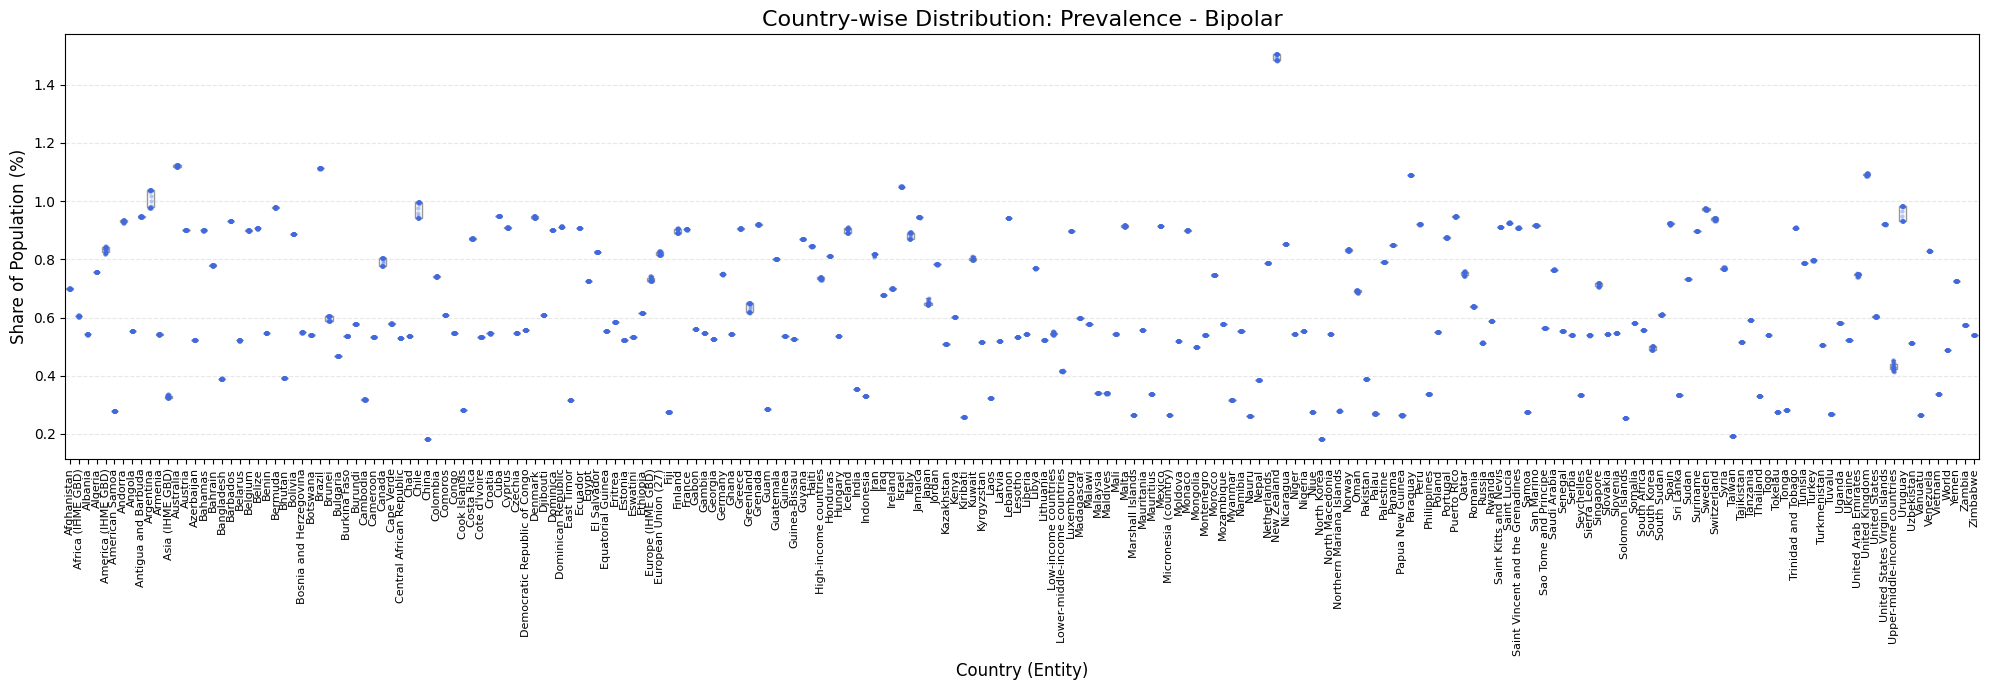

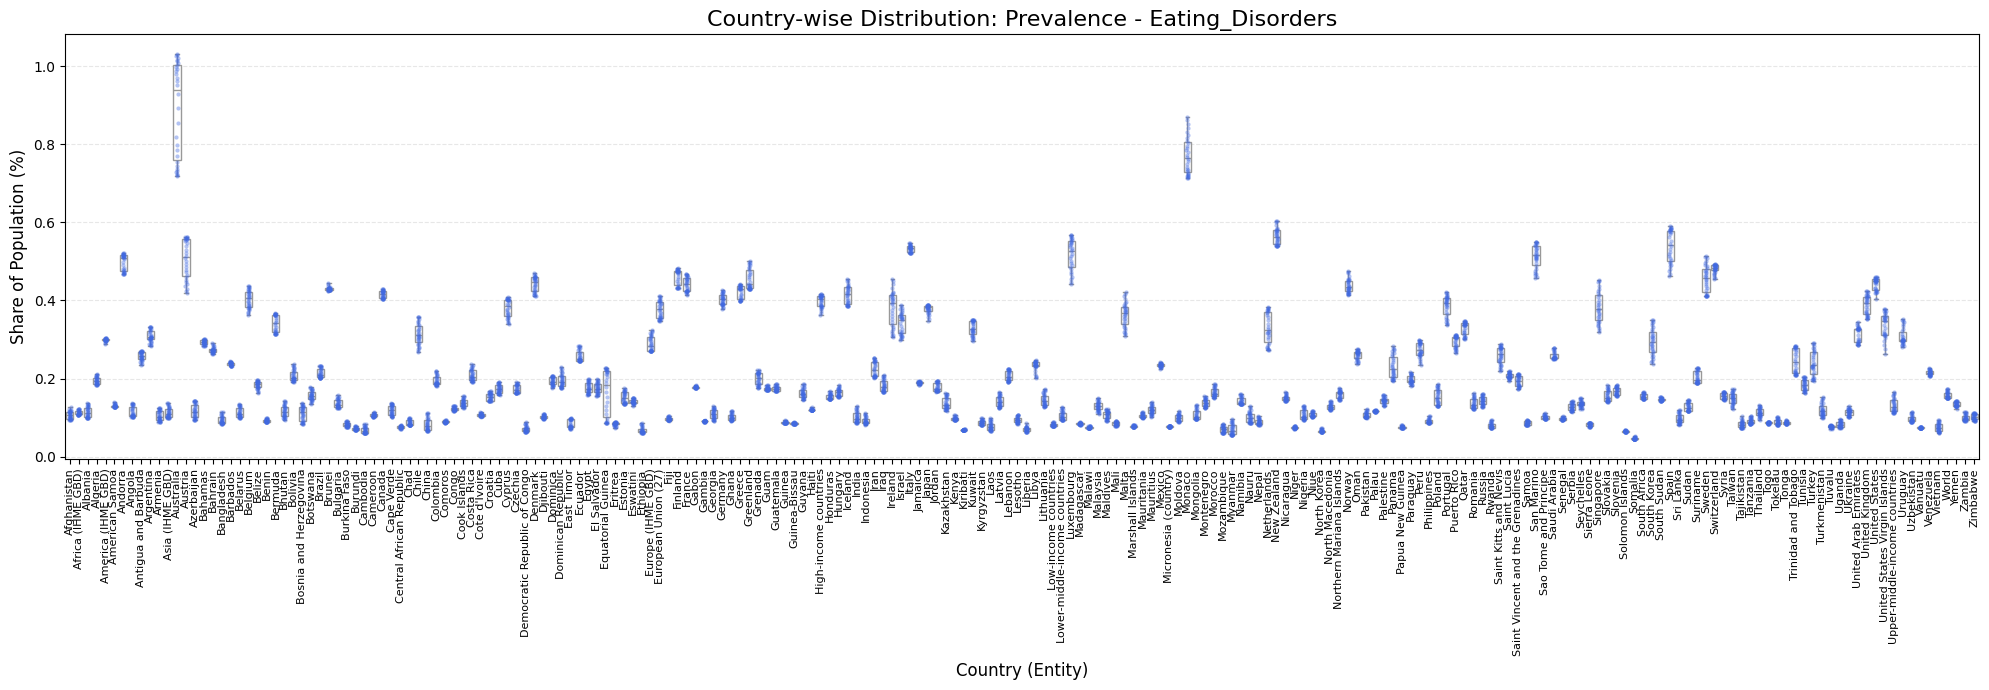


============================== DALYs 데이터 분석 시작 ==============================


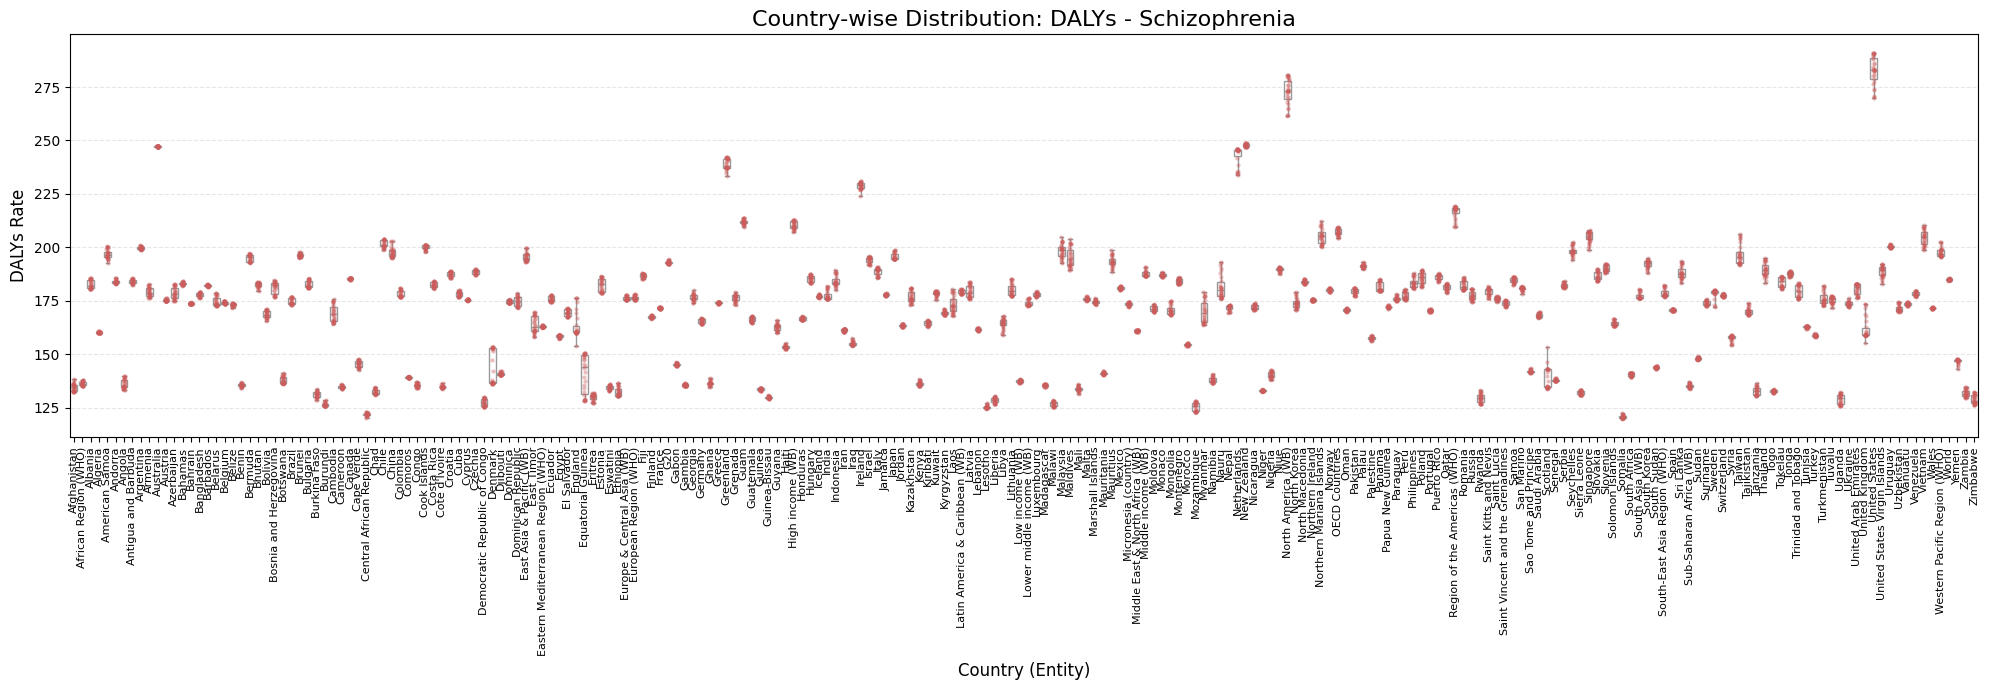

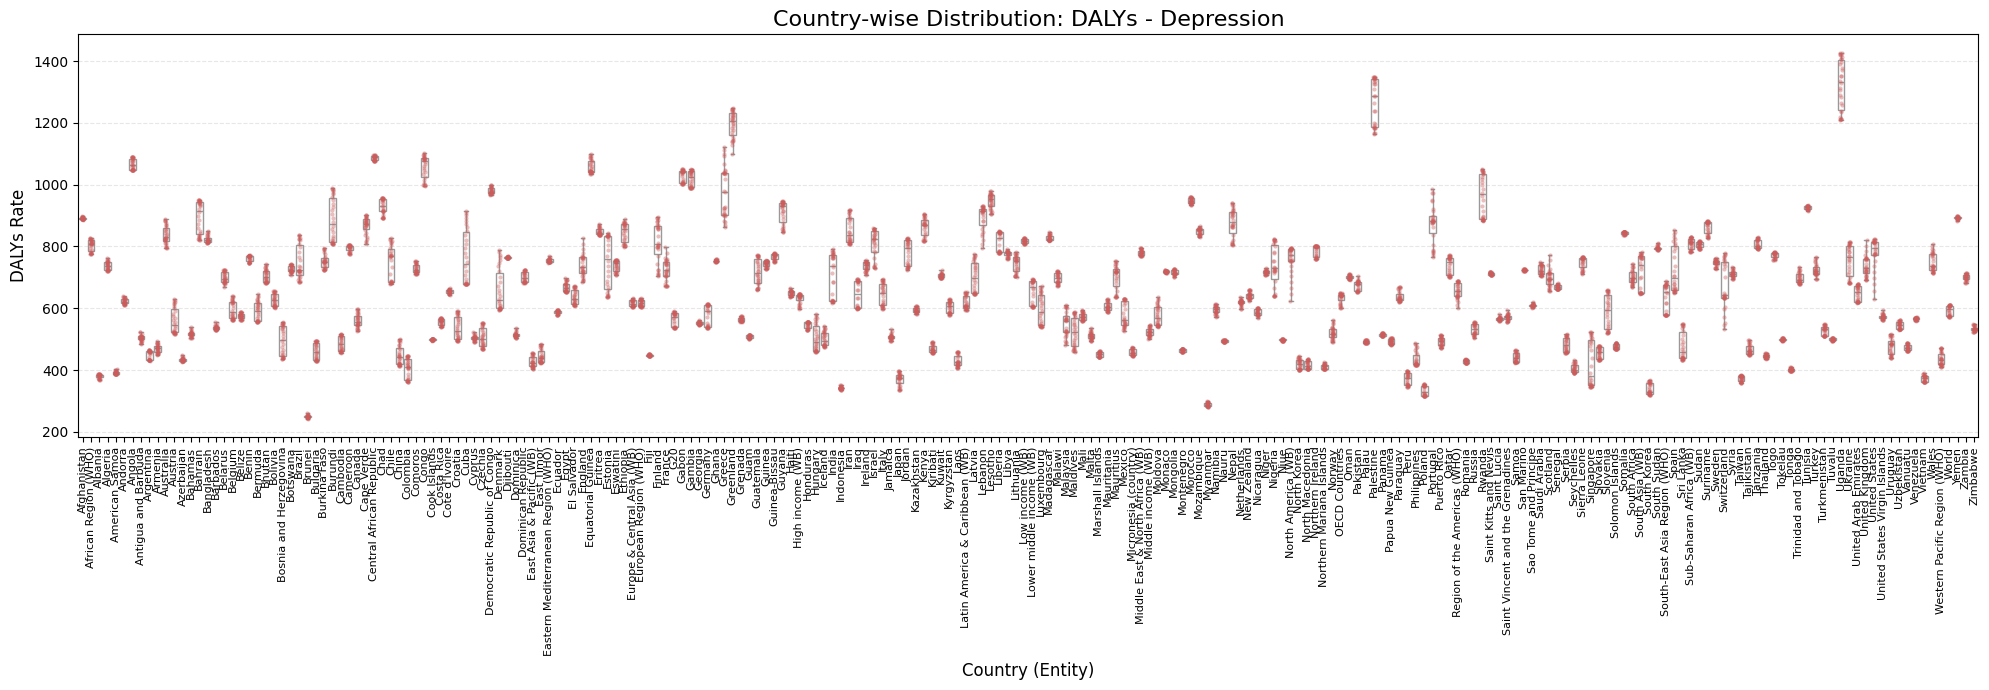

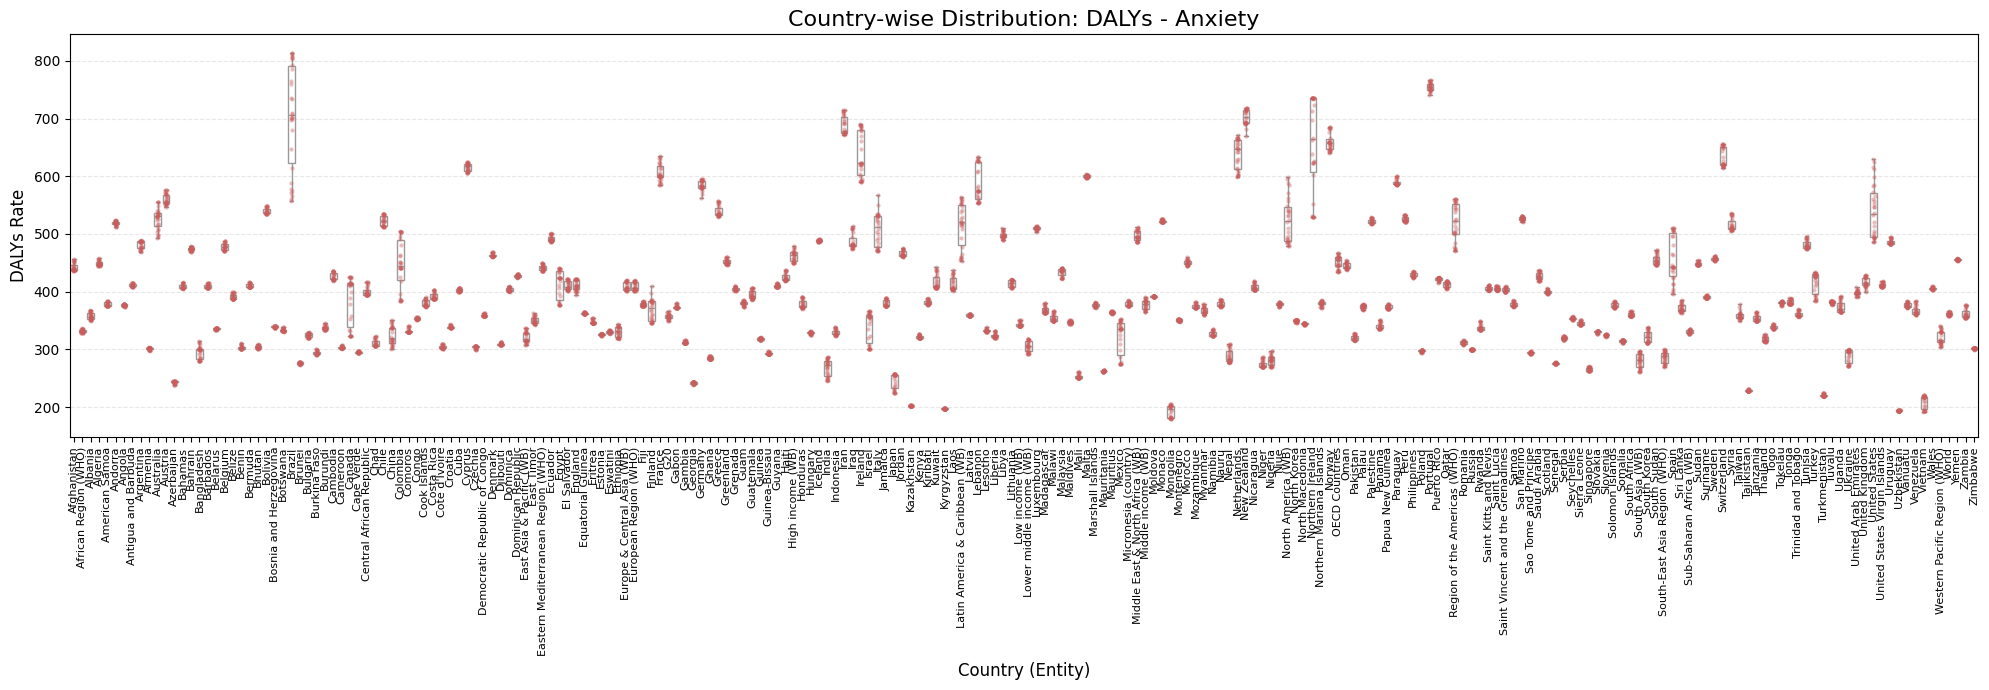

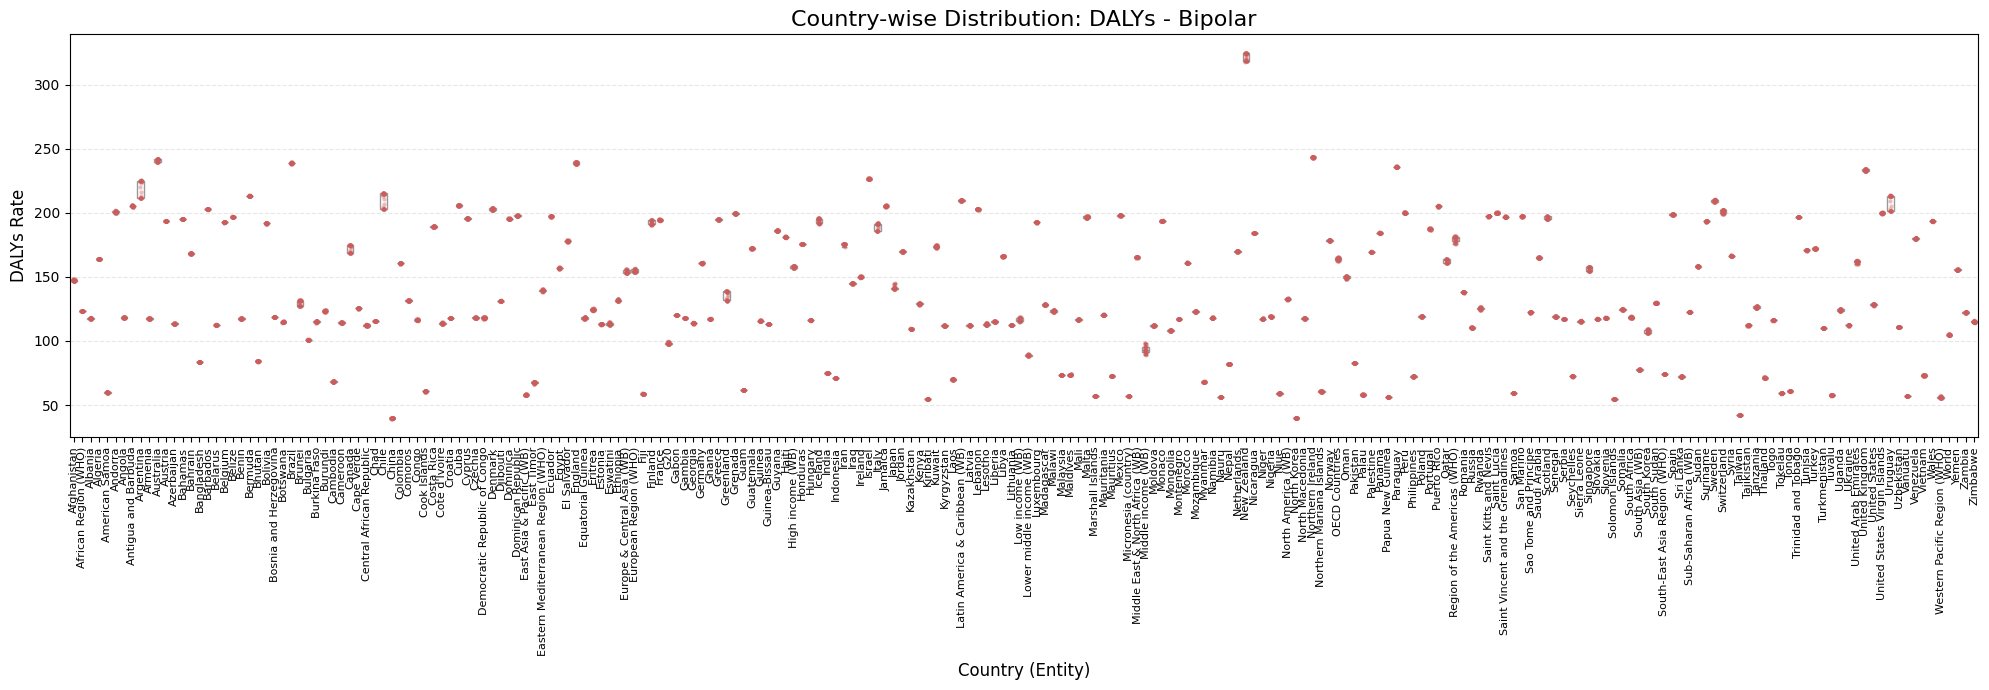

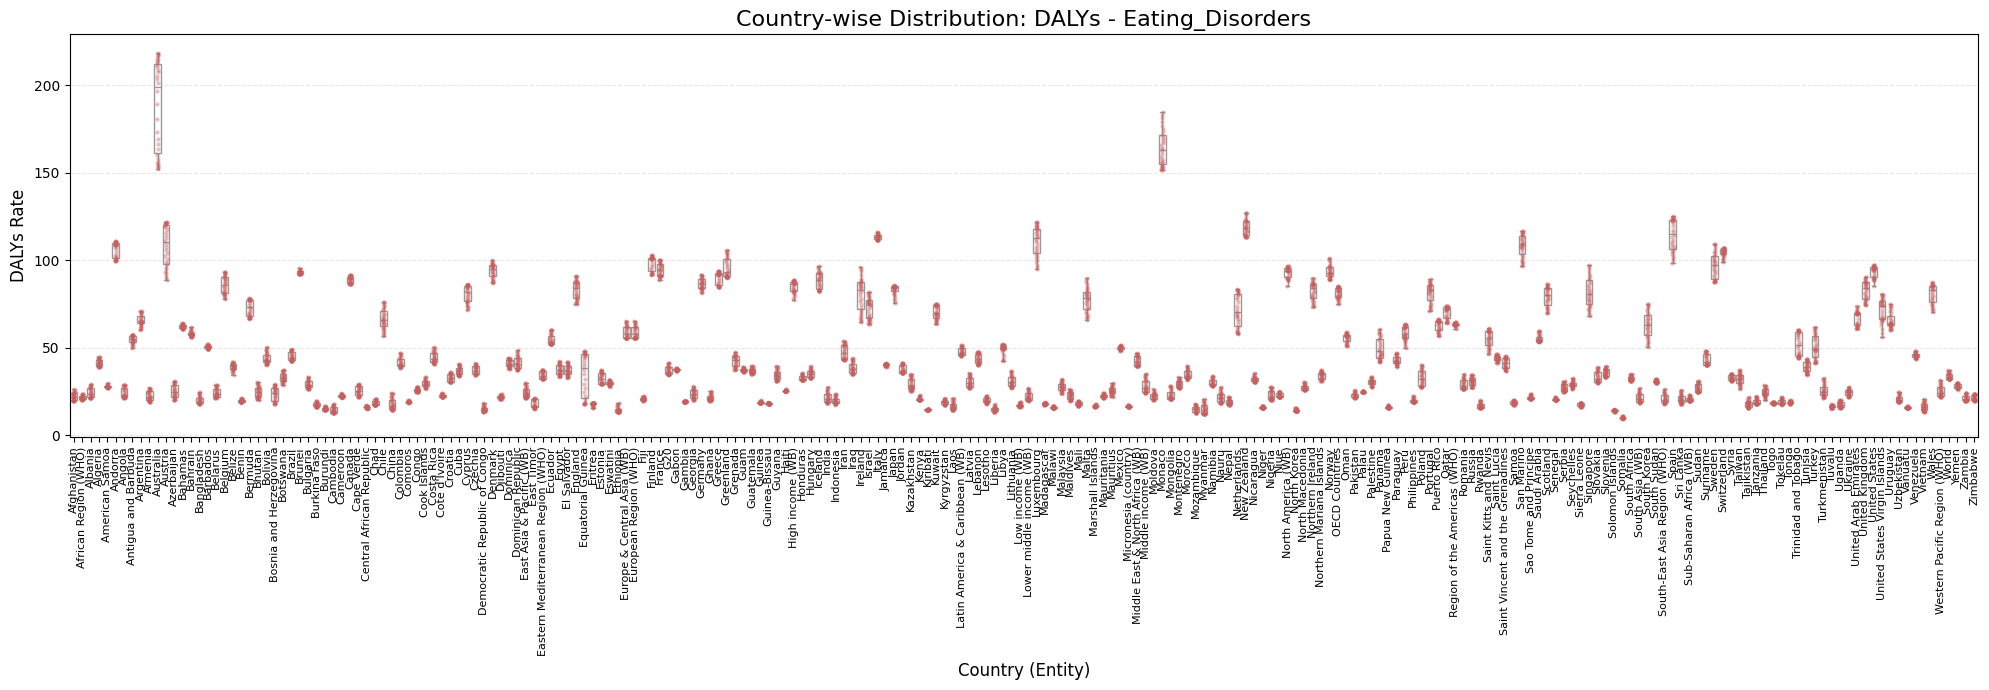

In [ ]:
plt.figure(figsize=(12, 6))

# 1. 박스플롯
sns.boxplot(data=prev_df[targets], whis=np.inf, color="white", showfliers=False)

# 2. 스트립플롯 (개별 점: 모든 국가/연도별 실제 데이터 포인트)
sns.stripplot(data=prev_df[targets], alpha=0.2, jitter=True, size=2, palette='Set2')

plt.title('Prevalence: Variability and Individual Observations by Mental Disorders')
plt.ylabel('Share of Population (%)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


plt.figure(figsize=(12, 6))
# 1. 박스플롯
sns.boxplot(data=dalys_df[targets], whis=np.inf, color="white", showfliers=False)

# 2. 스트립플롯 (개별 점: 모든 국가/연도별 실제 데이터 포인트)
sns.stripplot(data=dalys_df[targets], alpha=0.2, jitter=True, size=2, palette='viridis')

plt.title('Prevalence: Variability and Individual Observations by Mental Disorders')
plt.ylabel('Share of Population (%)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


# 분석할 데이터셋
datasets = [
    ('Prevalence', prev_df, 'royalblue', 'Share of Population (%)'),
    ('DALYs', dalys_df, 'indianred', 'DALYs Rate')
]

# 루프를 돌며 모든 그래프 생성
for data_name, df, point_color, y_label in datasets:
    print(f"\n{'='*30} {data_name} 데이터 분석 시작 {'='*30}")

    for disease in targets:
        plt.figure(figsize=(20, 7)) # 국가가 많으므로 가로로 길게 설정

        # 1. 박스플롯: 각 국가별 요약
        sns.boxplot(data=df, x='Entity', y=disease,
                    color='white', whis=np.inf, showfliers=False)

        # 2. 스트립플롯: 각 국가의 개별 관측치 점 (Jitter 추가)
        sns.stripplot(data=df, x='Entity', y=disease,
                      alpha=0.4, jitter=True, size=3, color=point_color)

        # 그래프
        plt.xticks(rotation=90, fontsize=8)
        plt.title(f'Country-wise Distribution: {data_name} - {disease}', fontsize=16)
        plt.ylabel(y_label, fontsize=12)
        plt.xlabel('Country (Entity)', fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.3)

        plt.tight_layout()
        plt.show() # 각 질병마다 그래프 출력

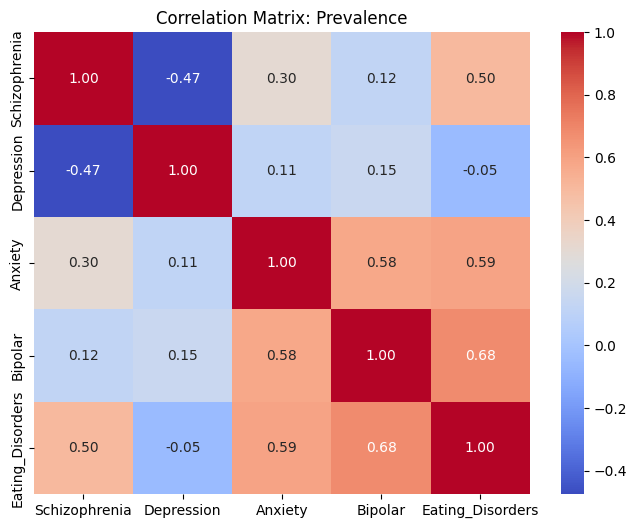

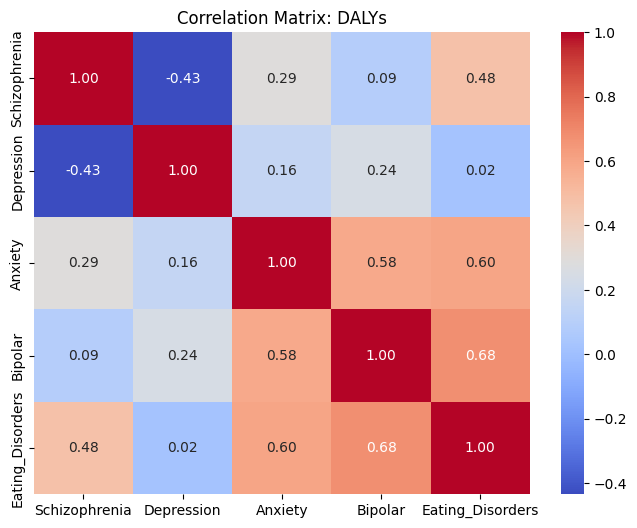

,Schizophrenia,Depression,Anxiety,Bipolar,Eating_Disorders
Schizophrenia,1.000000,-0.433923,0.289935,0.087265,0.478927
Depression,-0.433923,1.000000,0.158403,0.244559,0.023256
Anxiety,0.289935,0.158403,1.000000,0.584777,0.599805
Bipolar,0.087265,0.244559,0.584777,1.000000,0.677496
Eating_Disorders,0.478927,0.023256,0.599805,0.677496,1.000000


In [ ]:
# 3. 상관관계 분석
def run_correlation(df, title):
    targets = ['Schizophrenia', 'Depression', 'Anxiety', 'Bipolar', 'Eating_Disorders']
    corr = df[targets].corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Matrix: {title}')
    plt.show()
    return corr

run_correlation(prev_data, "Prevalence")
run_correlation(dalys_data, "DALYs")


--- Prevalence 추세 예측 분석 ---
[Anxiety] R²: 0.9114, MSE: 0.0001


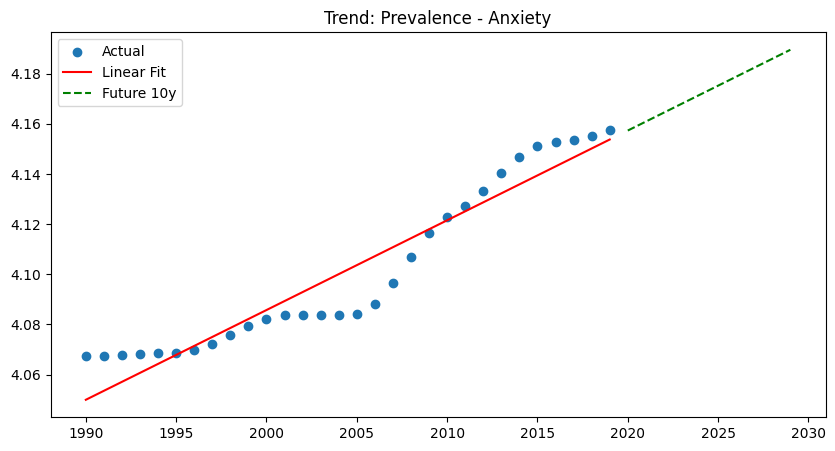

[Eating_Disorders] R²: 0.9720, MSE: 0.0000


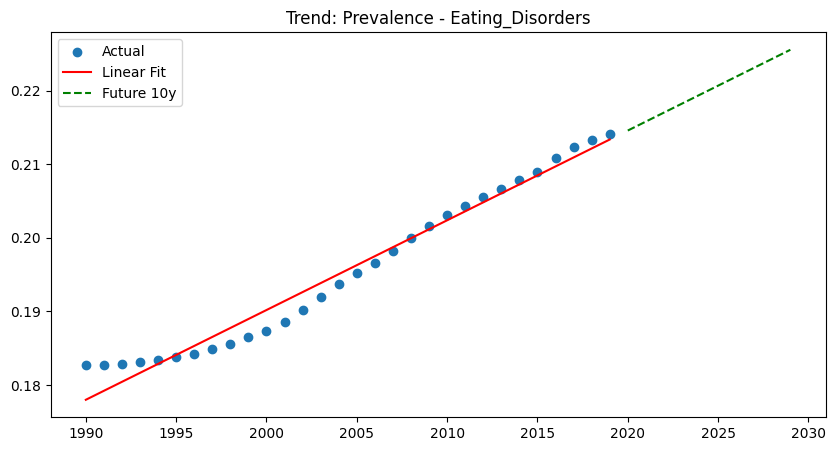

[Bipolar] R²: 0.8314, MSE: 0.0000


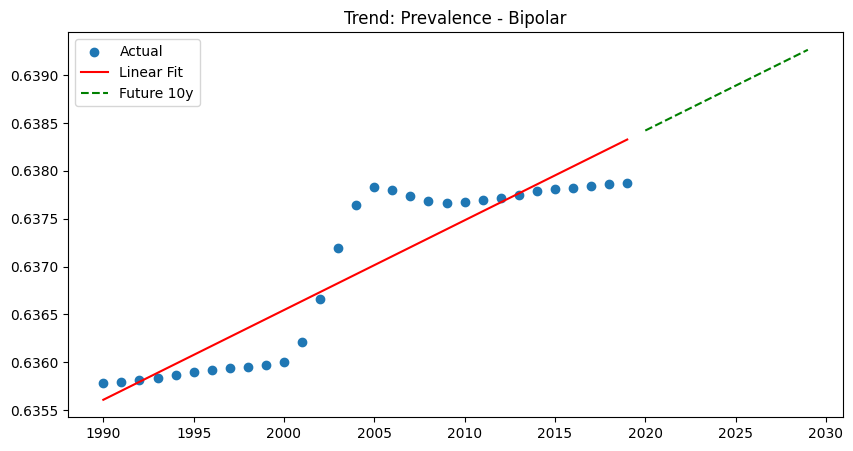


--- DALYs 추세 예측 분석 ---
[Anxiety] R²: 0.9631, MSE: 0.4177


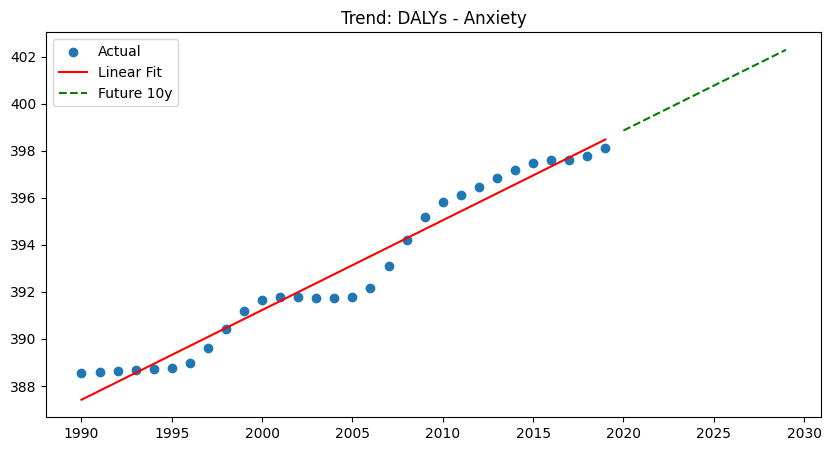

[Eating_Disorders] R²: 0.9761, MSE: 0.1303


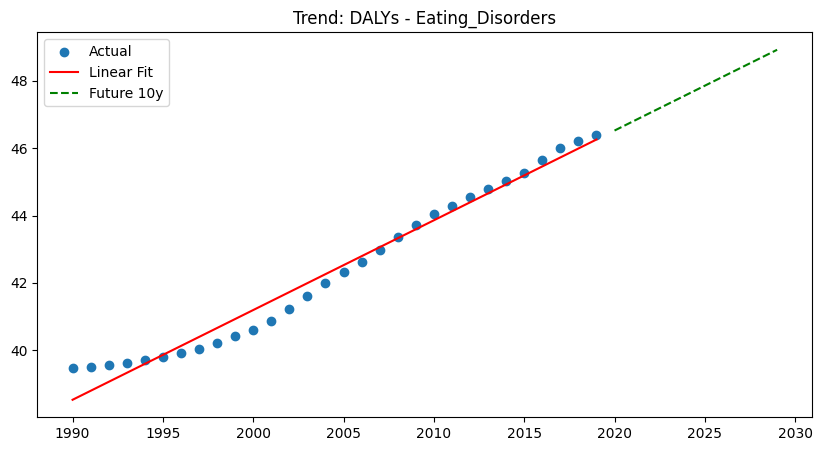

[Bipolar] R²: 0.8585, MSE: 0.0092


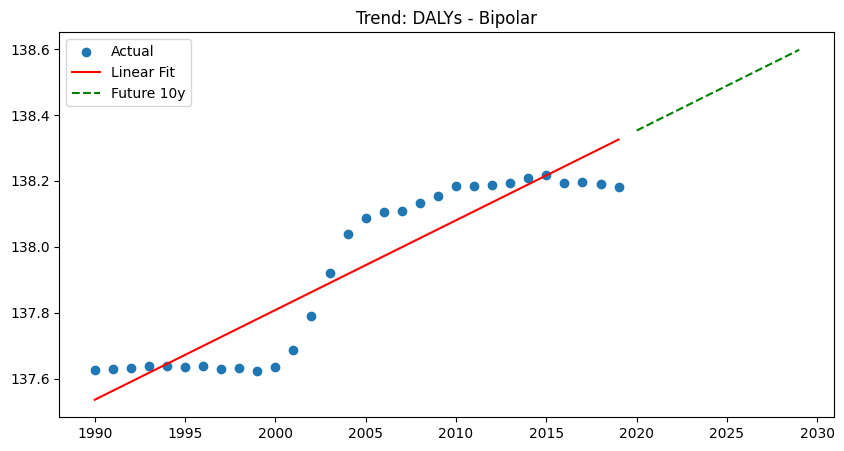

In [ ]:
# 4. 선형 회귀 추세 예측
def run_regression_trend(df, title):
    print(f"\n--- {title} 추세 예측 분석 ---")
    targets = ['Anxiety', 'Eating_Disorders', 'Bipolar']
    yearly_avg = df.groupby('Year')[targets].mean().reset_index()

    for col in targets:
        X = yearly_avg[['Year']]
        y = yearly_avg[col]

        model = LinearRegression().fit(X, y)
        preds = model.predict(X)

        r2 = r2_score(y, preds)
        mse = mean_squared_error(y, preds)
        print(f"[{col}] R²: {r2:.4f}, MSE: {mse:.4f}")



        future = pd.DataFrame({'Year': np.arange(X['Year'].max()+1, X['Year'].max()+11)})
        f_preds = model.predict(future)

        plt.figure(figsize=(10, 5))
        plt.scatter(X, y, label='Actual')
        plt.plot(X, preds, color='red', label='Linear Fit')
        plt.plot(future, f_preds, 'g--', label='Future 10y')
        plt.title(f'Trend: {title} - {col}')
        plt.legend()
        plt.show()

run_regression_trend(prev_data, "Prevalence")
run_regression_trend(dalys_data, "DALYs")

In [ ]:
def gini(x):
    x = np.sort(np.array(x))
    n = len(x)
    if n == 0 or np.sum(x) == 0: return 0
    return (n + 1 - 2 * np.sum(np.cumsum(x)) / x.sum()) / n

def run_advanced_analysis(df, title):
    target_cols = ['Anxiety', 'Eating_Disorders', 'Bipolar']

    for col in target_cols:
        # Gini 계수: 국가별로 계산
        print(f"gini coefficient for {col} of {title} by country")
        g_val = df.groupby('Entity')[col].apply(lambda x: gini(x.dropna().values))
        print(g_val.sort_values(ascending=False))

        # 실루엣 분석을 위한 피벗 테이블 (국가별 연도 데이터)
        pivot = df.pivot_table(index='Entity', columns='Year', values=col).fillna(0)

        if not pivot.empty:
            # K-Means 군집화 (그룹 3개)
            kmeans = KMeans(n_clusters=3, random_state=0, n_init=10).fit(pivot)
            score = silhouette_score(pivot, kmeans.labels_)
            print(f"Silhouette Score: {score:.4f}")

run_advanced_analysis(prev_df, "Prevalence")
run_advanced_analysis(dalys_df, "DALYs")



gini coefficient for Anxiety of Prevalence by country
Entity
Brazil                          0.071770
Canada                          0.055326
Colombia                        0.052826
Spain                           0.048647
Mexico                          0.048637
                                  ...   
Senegal                         0.001269
Democratic Republic of Congo    0.001168
Yemen                           0.001146
Congo                           0.000787
Kyrgyzstan                      0.000639
Name: Anxiety, Length: 214, dtype: float64
Silhouette Score: 0.5091
gini coefficient for Eating_Disorders of Prevalence by country
Entity
Equatorial Guinea         0.189630
Myanmar                   0.106039
China                     0.102431
Bosnia and Herzegovina    0.091928
Azerbaijan                0.084969
                            ...   
Gambia                    0.006246
Gabon                     0.006038
Palau                     0.006025
America (IHME GBD)        0.005755
